# Modelo de análise do conjunto de dados de Boston para prever o valor das casas

## Analisando e tratando os dados

In [178]:
# Realizando os imports necessários
import numpy as np             # Operações matemática dos dados
import sklearn                 # Predição dos modelos
import pandas as pd            # Manipulação dos dados
import matplotlib.pyplot as plt       # Visualização 
import seaborn as sns
import scipy.stats as stats    # Análises estatísticas
from sklearn.linear_model import LinearRegression # Módulode LR
%matplotlib inline             

In [179]:
# Carregando o conjunto de dados 
from sklearn.datasets import load_boston
data = load_boston()

In [180]:
# visualizando o tipo de dados
type(data)

sklearn.utils.Bunch

In [181]:
# transformando o conjunto de dados em um dataframe pandas
boston = pd.DataFrame(data.data)

In [182]:
# Visualizando uma descrição dos valores do dataset
boston.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [183]:
# Visualizando as primeiras linhas
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [184]:
# Nomes das colunas originais do dataframe formato Bunch
names = data.feature_names
names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [185]:
# Trocando os nomes das columnas do dataframe pandas para os nomes originais 
boston.columns = names
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [186]:
# Verificando a forma do dataset
boston.shape

(506, 13)

In [187]:
# Verificando ocorrência de valor nulo
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [188]:
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [213]:
bostonNorm = (boston - boston.mean())/(boston.std())
bostonNorm.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953


In [214]:
# Definindo a variável target e a colocando no dataset
y = data.target #(data é o dataset original do sklearn)
y[1]

21.6

## Depois de formatados e tratados os dados, vamos prever os preços das casas 

In [215]:
# Features
X = bostonNorm

In [216]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953


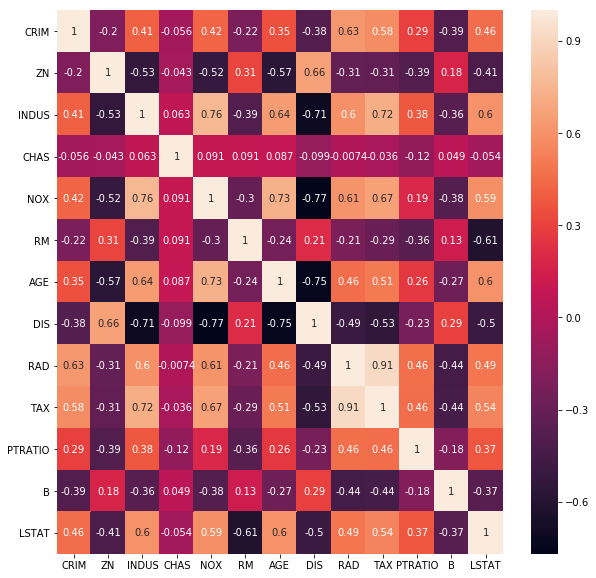

In [218]:
# Plotando o Gráfico da Correlação entre os Valores
figure,ax = plt.subplots(figsize = (10,10))
sns.heatmap(X.corr(), annot=True )

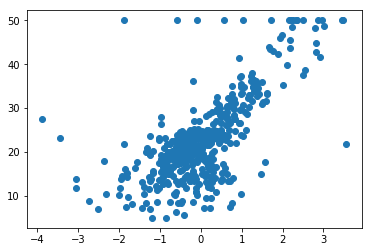

In [257]:
plt.scatter(X['RM'], y)

In [282]:
model = LinearRegression()
model.fit(X,y)

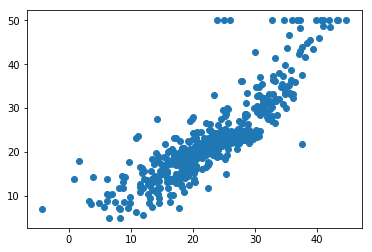

In [270]:
# Prevendo o preço da casa com variável TAX
plt.scatter(model.predict(X), y)

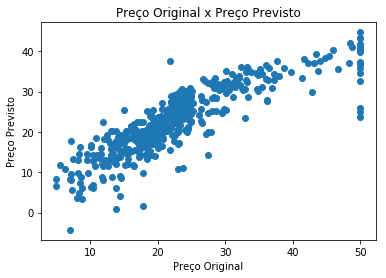

In [280]:
# Comparando preços originais x preços previstos
plt.scatter(y, model.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

In [281]:
# Calculando MSE
mse = np.mean((y - model.predict(X)) ** 2)
mse

21.894831181729206

## Dividindo o dataset em Teste e Treino

In [300]:
# Dividindo o dataset 
X_treino = X[:-50]  # (0 até 455)
X_teste = X[-50:] # (456 até 505)

y_treino = y[:-50]  # (0 até 455)
y_teste = y[-50:] # (456 até 505)

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


In [308]:
# Divisão randômica dos dados (33% para teste e 77% para treino)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [309]:
# Imprimindo o shape dos datasets após o split
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(339, 13) (167, 13) (339,) (167,)


In [314]:
# Criando o modelo de regressão linear
model = LinearRegression()

In [315]:
# Treinando o modelo
model.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [321]:
predicao_treino = model.predict(X_treino)
predicao_treino[0]

13.160728758995116

In [322]:
predicao_teste = model.predict(X_teste)
predicao_teste[0]

37.467235618674266

Text(0.5, 1.0, 'Treino (azul) x Teste (Verde)')

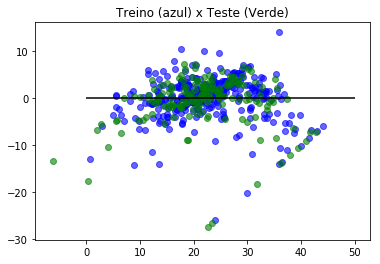

In [333]:
#Comparando preços originais e previstos
plt.scatter(predicao_treino, predicao_treino - y_treino, c='b', alpha=0.6)
plt.scatter(predicao_teste, predicao_teste - y_teste, c='g', alpha=0.6)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title("Treino (azul) x Teste (Verde)")

In [336]:
# Calculando MSE
mse = np.mean((y_treino - model.predict(X_treino)) ** 2)
mse

19.54675847353467